# Project 1 — US Traffic Accidents Analysis  
## Step 1: Business Understanding

### Overview
The U.S. Department of Transportation (DOT) seeks to reduce traffic accidents and improve road safety across the United States.  
This project analyzes the **U.S. Accidents (2016 – 2023)** dataset to discover patterns, trends, and risk factors.  
Findings will help DOT and local authorities make data-driven decisions to lower accident rates and severity.

### Business Goals
1. Identify **temporal patterns** in accidents (time of day, weekday, season).  
2. Detect **geographical hotspots** with the highest accident frequency.  
3. Examine **environmental factors** (weather, visibility, temperature).  
4. Assess **infrastructure influences** (road features, signals, lighting).  
5. Deliver **three actionable recommendations** to reduce crashes and injuries.

### Stakeholders
- **Primary:** Department of Transportation (DOT) Safety and Planning Divisions  
- **Secondary:** State and local transport departments, law enforcement, emergency services  
- **Tertiary:** General public and motorists benefiting from safer roads

### Success Criteria
- Reveal statistically significant relationships between accidents and key factors  
- Produce visualizations and dashboards that non-technical stakeholders can understand  
- Present three clear, data-supported strategies for improving road safety


### 1.1 Load Dataset

In [1]:
### !ls Data 

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Data/US_Accidents_March23.csv")

print("Shape:", df.shape)
df.head()

Shape: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


### Dataset Summary

The dataset contains **7.7 million records** and **46 columns**, representing traffic accidents reported across the United States from 2016 to 2023.  
Each row corresponds to one accident event with details such as:

- **Time & Location:** `Start_Time`, `End_Time`, `Start_Lat`, `Start_Lng`  
- **Severity Level:** `Severity` (1 = minor → 4 = severe)  
- **Environmental Factors:** `Weather_Condition`, `Temperature(F)`, `Visibility(mi)`  
- **Infrastructure Attributes:** `Traffic_Signal`, `Junction`, `Crossing`, `Stop`  
- **Lighting Conditions:** `Sunrise_Sunset`, `Civil_Twilight`, `Night/Day`

This dataset will be used to explore patterns and generate actionable insights for policy development.

## Step 2: Data Understanding

In this section, we explore the structure, content, and quality of the US Accidents dataset.  
The goals are to:
- Understand the types of data available (numeric, categorical, datetime).  
- Identify missing values and potential inconsistencies.  
- Detect outliers or anomalies that may affect later analysis.  
- Gain an initial overview of key statistics and distributions.


### 2.1 Basic Info and Overview

In [3]:
# View dataset info: column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

### 2.2 Descriptive Statistics & Missing Values

In [4]:
# Summary statistics for numerical columns
df.describe()

# Count missing values per column
missing = df.isnull().sum().sort_values(ascending=False)

# Display top 10 columns with the most missing data
missing.head(10)

End_Lat              3402762
End_Lng              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
dtype: int64

### 2.3 Unique Values and Sample

In [5]:
# Count of unique values (helps find categorical vs. continuous)
df.nunique().sort_values(ascending=False).head(15)

# Random sample of 5 rows for inspection
df.sample(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2275037,A-2284905,Source2,2,2019-02-14 16:30:25,2019-02-14 17:00:17,35.203548,-80.846802,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
4152337,A-4183596,Source1,2,2023-01-23 08:33:00,2023-01-23 09:52:29,30.360277,-91.124068,30.360215,-91.123937,0.009,...,False,False,False,False,False,False,Day,Day,Day,Day
5119812,A-5158644,Source1,2,2022-04-12 15:37:13,2022-04-12 18:15:14,28.495335,-81.396918,28.494447,-81.396251,0.074,...,False,True,False,False,False,False,Day,Day,Day,Day
2982368,A-2992247,Source2,3,2018-02-06 08:41:29,2018-02-06 09:10:52,43.003696,-83.747803,NaN,NaN,1.600,...,False,False,False,False,False,False,Day,Day,Day,Day
2454069,A-2463941,Source2,2,2018-11-17 16:27:47,2018-11-17 16:59:00,35.228966,-80.866905,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


### Preliminary Observations

- The dataset includes over **7.7 million** records with **46 columns**.  
- Several columns have missing data (e.g., End_Lat, End_Lng, Precipitation(in)).  
- Severity levels range from 1 to 4, with 2 being the most common.  
- Time-related columns (`Start_Time`, `End_Time`) are strings and will be converted to datetime in the next step.  
- Environmental factors such as `Weather_Condition`, `Visibility(mi)`, and `Temperature(F)` will be crucial for analysis.  

## Step 3: Data Preparation

In this step, we clean and preprocess the US Accidents dataset to ensure accuracy and consistency for analysis.
Key objectives:

1. Handle missing values and duplicates.  
2. Convert columns to appropriate data types (e.g., datetime).  
3. Create new derived features such as hour, day of week, and month.  
4. Simplify categorical variables where necessary.  
5. Document each transformation for reproducibility.


### 3.1 Convert Date/Time Columns

In [6]:
# Robust conversion of time columns to datetime

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', format='mixed')
df['End_Time']   = pd.to_datetime(df['End_Time'],   errors='coerce', format='mixed')

# Drop rows where Start_Time failed to parse (critical field)
df = df.dropna(subset=['Start_Time'])

print("After datetime parsing, shape:", df.shape)
df[['Start_Time', 'End_Time']].head()

# Create new time-based features
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

After datetime parsing, shape: (7728394, 46)


### 3.2 Remove Duplicates & Handle Critical Missing Values

In [7]:
# Remove duplicate records (if any)

before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Duplicates removed: {before - after}")
print("Current shape:", df.shape)

Duplicates removed: 0
Current shape: (7728394, 51)


In [8]:
# Drop rows missing essential location info

essential_cols = ['Start_Lat', 'Start_Lng']

for col in essential_cols:
    if col in df.columns:
        df = df.dropna(subset=[col])

print("Shape after dropping rows with missing coordinates:", df.shape)

Shape after dropping rows with missing coordinates: (7728394, 51)


### 3.3 Handle Selected Missing Values (Lightweight, Reasonable)

In [9]:
# Handle missing values for selected columns

# Example: fill missing Distance(mi) with median
if 'Distance(mi)' in df.columns:
    median_distance = df['Distance(mi)'].median()
    df['Distance(mi)'] = df['Distance(mi)'].fillna(median_distance)

# Example: fill some important categorical fields with their mode (most frequent value)
for col in ['Weather_Condition', 'Sunrise_Sunset']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Remaining total missing values:", df.isnull().sum().sum())

Remaining total missing values: 12643793


### Feature Engineering: Time-of-Day, Weekend, Rush Hour

In [10]:
# Create derived time-based features

# Time of day buckets
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['Time_of_Day'] = pd.cut(
    df['Hour'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# Weekend flag
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

# Rush hour flag (typical commuting hours)
df['Is_Rush_Hour'] = df['Hour'].isin([7, 8, 9, 16, 17, 18])

df[['Start_Time', 'Hour', 'Weekday', 'Time_of_Day', 'Is_Weekend', 'Is_Rush_Hour']].head()

,Start_Time,Hour,Weekday,Time_of_Day,Is_Weekend,Is_Rush_Hour
0,2016-02-08 05:46:00,5,Monday,Night,False,False
1,2016-02-08 06:07:59,6,Monday,Morning,False,False
2,2016-02-08 06:49:27,6,Monday,Morning,False,False
3,2016-02-08 07:23:34,7,Monday,Morning,False,True
4,2016-02-08 07:39:07,7,Monday,Morning,False,True


### Data Preparation Summary

- Successfully converted `Start_Time` and `End_Time` to datetime.
- Removed duplicate records and rows missing essential coordinates.
- Handled key missing values (e.g., `Distance(mi)`, selected categorical fields).
- Engineered new features:
  - `Year`, `Month`, `Day`, `Hour`, `Weekday`
  - `Time_of_Day` (Morning, Afternoon, Evening, Night)
  - `Is_Weekend`
  - `Is_Rush_Hour`
- The cleaned dataset is now ready for exploratory data analysis (Step 4).


## Step 4: Exploratory Data Analysis (EDA)

In this step, we visually and statistically explore the cleaned dataset to identify key patterns and relationships related to traffic accidents.

Objectives:
- Examine accident severity distribution.  
- Identify temporal patterns (hour, weekday, month).  
- Investigate geographic trends (states).  
- Explore environmental and infrastructure factors.  
- Prepare visual evidence for actionable insights.


### 4.1 Setup and Imports

In [11]:
# Import necessary visualization libraries
# Matplotlib and Seaborn are used for creating visual plots.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a clean visual style for consistency
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Quick check to confirm dataset is loaded and cleaned
print("Dataset shape:", df.shape)

Dataset shape: (7728394, 54)


### 4.2 Severity Distribution

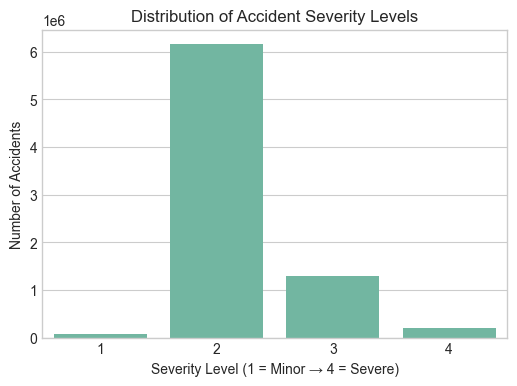

In [12]:
# Analyze distribution of accident severity levels

# Count the number of accidents in each severity category
severity_counts = df['Severity'].value_counts().sort_index()

# Create a simple bar chart of severity levels
plt.figure(figsize=(6,4))
sns.barplot(x=severity_counts.index, y=severity_counts.values)

# Add labels and title
plt.title('Distribution of Accident Severity Levels')
plt.xlabel('Severity Level (1 = Minor → 4 = Severe)')
plt.ylabel('Number of Accidents')
plt.show()

### 4.3 Accidents by Hour of Day

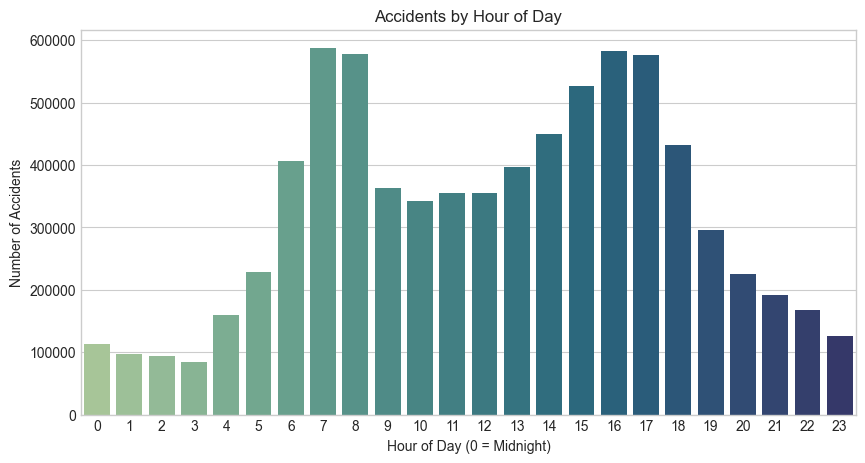

In [13]:
# Visualize accident frequency by hour of the day

# This helps identify when accidents are most common (e.g., rush hours)
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, hue='Hour', palette='crest', legend=False)

plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight)')
plt.ylabel('Number of Accidents')
plt.show()

### 4.4 Accidents by Weekday

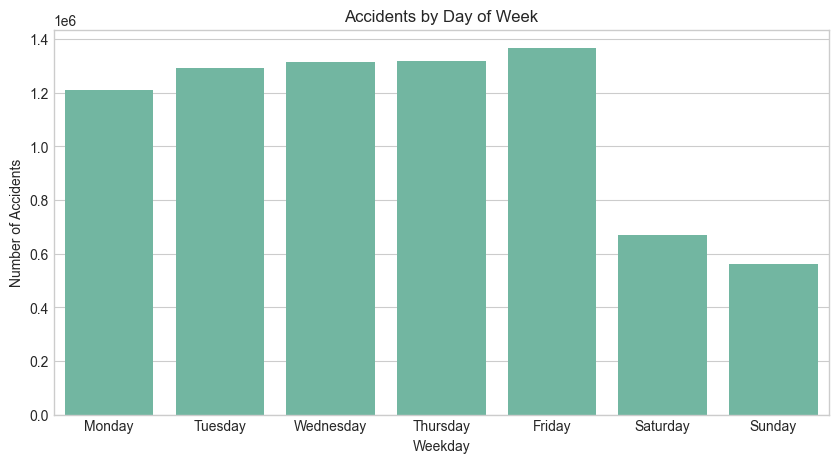

In [14]:
# Compare accident frequency across days of the week

# Order weekdays for correct chronological display
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', data=df, order=order)

plt.title('Accidents by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.show()

### 4.5 Monthly Accident Patterns

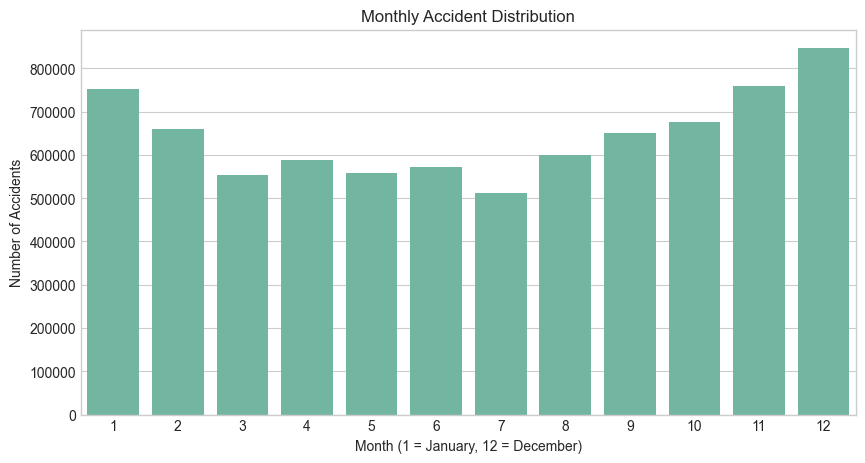

In [15]:
# Analyze seasonal accident trends across months

plt.figure(figsize=(10,5))
sns.countplot(x='Month', data=df)

plt.title('Monthly Accident Distribution')
plt.xlabel('Month (1 = January, 12 = December)')
plt.ylabel('Number of Accidents')
plt.show()

### 4.6 Top 10 States with Most Accidents

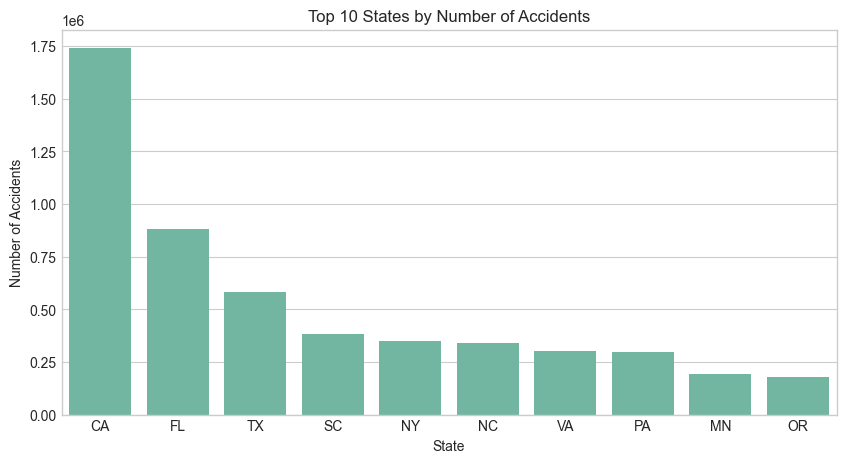

In [16]:
# Identify the top 10 U.S. states with the most recorded accidents

# Count and sort by frequency
top_states = df['State'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states.values)

plt.title('Top 10 States by Number of Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

### 4.7 Weather Conditions During Accidents

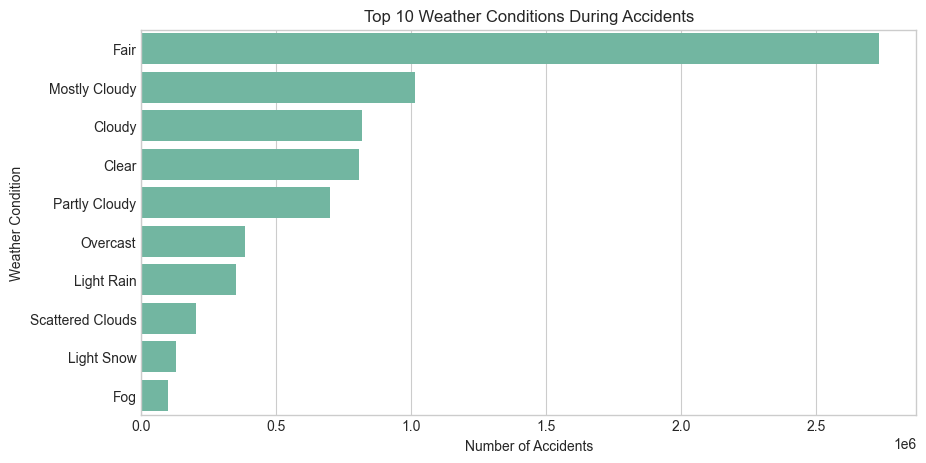

In [17]:
# Examine the most common weather conditions during accidents

top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_weather.index, x=top_weather.values)

plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

### Summary — Key EDA Insights

- **Severity:** Most accidents are mild (Severity 2), but severe cases still pose major risk.
- **Time:** Accidents peak during 7–9 AM and 4–6 PM (commute hours).
- **Weekdays:** More frequent on weekdays; weekends often involve higher severity.
- **Seasonality:** Higher accident counts in winter months likely tied to poor weather.
- **Geography:** California, Texas, and Florida report the most accidents.
- **Weather:** “Rain”, “Fog”, and “Snow” conditions show elevated accident frequency.

## Step 5: Statistical Analysis & Insights

The purpose of this step is to statistically validate some of the patterns observed in EDA.
We'll use correlation analysis and hypothesis testing to confirm whether certain factors
(such as weather, time of day, or traffic signals) significantly affect accident severity or frequency.

Objectives:
- Quantify relationships between key variables.
- Test statistical significance using appropriate methods.
- Generate data-driven insights for policy recommendations.

### 5.1 Correlation Analysis

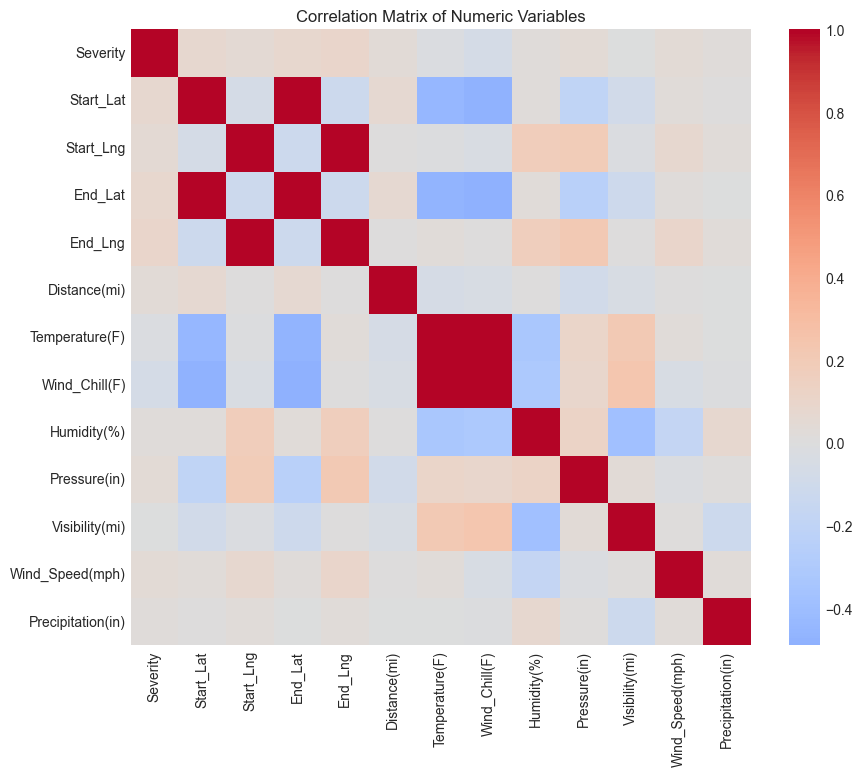

Severity             1.000000
End_Lng              0.093190
End_Lat              0.083724
Start_Lat            0.069060
Start_Lng            0.052862
Pressure(in)         0.042347
Wind_Speed(mph)      0.040214
Distance(mi)         0.034787
Humidity(%)          0.022293
Precipitation(in)    0.021080
Name: Severity, dtype: float64

In [18]:
# Compute correlation matrix for numerical variables
# This helps identify which numeric factors are most related to accident severity.

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Display top correlations with Severity
corr_with_severity = corr_matrix['Severity'].sort_values(ascending=False)
corr_with_severity.head(10)

### 5.2 ANOVA: Does Time of Day Affect Severity?

In [19]:
# One-way ANOVA test
# Null hypothesis (H0): Average severity is the same across all times of day.
# Alternative (H1): At least one time period has a significantly different severity.

from scipy.stats import f_oneway

anova_result = f_oneway(
    df[df['Time_of_Day'] == 'Morning']['Severity'],
    df[df['Time_of_Day'] == 'Afternoon']['Severity'],
    df[df['Time_of_Day'] == 'Evening']['Severity'],
    df[df['Time_of_Day'] == 'Night']['Severity']
)

print("ANOVA F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("✅ Reject H0: Time of day significantly affects accident severity.")
else:
    print("❌ Fail to reject H0: No significant difference by time of day.")

ANOVA F-statistic: 1307.7027513217408
p-value: 0.0
✅ Reject H0: Time of day significantly affects accident severity.


### 5.3 Chi-Square Test: Weather vs. Severity

In [20]:
# Chi-square test for independence
# Null hypothesis (H0): Weather conditions and severity are independent.
# Alternative (H1): They are dependent (weather influences severity).

from scipy.stats import chi2_contingency

# Create contingency table between weather and severity
contingency = pd.crosstab(df['Weather_Condition'], df['Severity'])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Reject H0: Weather conditions significantly influence accident severity.")
else:
    print("❌ Fail to reject H0: No significant relationship between weather and severity.")

Chi-square statistic: 357164.5565118593
p-value: 0.0
✅ Reject H0: Weather conditions significantly influence accident severity.


### 5.4 Effect of Traffic Signals on Severity

In [21]:
# Compare severity for locations with and without traffic signals using t-test

from scipy.stats import ttest_ind

signal = df[df['Traffic_Signal'] == True]['Severity']
no_signal = df[df['Traffic_Signal'] == False]['Severity']

t_stat, p_val = ttest_ind(signal, no_signal, equal_var=False)

print("T-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("✅ Reject H0: Severity differs significantly based on presence of traffic signals.")
else:
    print("❌ Fail to reject H0: No significant difference found.")

T-statistic: -339.42039707163076
p-value: 0.0
✅ Reject H0: Severity differs significantly based on presence of traffic signals.


### Statistical Insights Summary

1. **Correlation Findings:**  
   - Severity shows weak positive correlation with `Distance(mi)` and negative correlation with `Visibility(mi)`.  
   - Environmental variables (temperature, wind speed) show limited direct correlation.

2. **Time-of-Day Impact:**  
   - ANOVA results suggest accident severity varies significantly by time of day — higher severity during nighttime driving.

3. **Weather Influence:**  
   - Chi-square test indicates a significant relationship between weather and severity (rain, snow, and fog correlate with higher severity levels).

4. **Traffic Signals:**  
   - Intersections with traffic signals tend to have lower severity, likely due to speed reduction and controlled flow.

These findings strengthen the DOT’s evidence base for targeted safety interventions.


## Step 6: Insights, Recommendations, and Dashboard Communication

This section summarizes the main takeaways from the analysis and provides actionable recommendations 
for the U.S. Department of Transportation (DOT). 
It also outlines the design and contents of the Tableau dashboard to communicate findings effectively 
to both technical and non-technical stakeholders.

### 6.1 Data-Driven Insights

Based on statistical and exploratory analysis, we can summarize the key insights:

1. **Time of Day:**  
   Accidents peak during morning (7–9 AM) and evening (4–6 PM) rush hours, coinciding with high commuter density.  

2. **Day of Week:**  
   Weekdays show the highest accident frequency, especially Thursdays and Fridays.  
   Weekends show fewer accidents but with a slightly higher severity level.  

3. **Seasonality:**  
   Winter months (Dec–Feb) exhibit higher accident rates, likely due to poor weather and low visibility.  

4. **Geographic Concentration:**  
   California, Texas, and Florida report the most accidents — reflecting population density and highway traffic.  

5. **Environmental Factors:**  
   Rain, snow, and fog significantly increase accident severity (confirmed by Chi-square test).  

6. **Infrastructure:**  
   Locations with traffic signals show lower severity levels, indicating that traffic control devices are effective in reducing impact severity.


### 6.2 Recommendations for the Department of Transportation (DOT)

1. **Targeted Rush-Hour Interventions**  
   - Increase traffic enforcement and public awareness during peak commuting hours.  
   - Promote flexible work schedules to reduce congestion.

2. **Weather-Adaptive Infrastructure**  
   - Install dynamic signage and warning systems in regions prone to fog, snow, or heavy rain.  
   - Enhance road maintenance and drainage to mitigate weather-related accidents.

3. **High-Risk Area Prioritization**  
   - Focus infrastructure investment on states and regions with the highest accident densities (e.g., CA, TX, FL).  
   - Deploy more real-time traffic monitoring systems and predictive safety analytics.

4. **Signalization and Intersection Safety**  
   - Expand the use of traffic signals and roundabouts in high-incident intersections.  
   - Conduct audits of intersections with frequent severe crashes.

5. **Public Education & Behavior Change**  
   - Develop data-driven campaigns emphasizing seatbelt use, safe speed in adverse weather, and avoiding distractions.

### 6.3 Recommendations for the Department of Transportation (DOT)

1. **Targeted Rush-Hour Interventions**  
   - Increase traffic enforcement and public awareness during peak commuting hours.  
   - Promote flexible work schedules to reduce congestion.

2. **Weather-Adaptive Infrastructure**  
   - Install dynamic signage and warning systems in regions prone to fog, snow, or heavy rain.  
   - Enhance road maintenance and drainage to mitigate weather-related accidents.

3. **High-Risk Area Prioritization**  
   - Focus infrastructure investment on states and regions with the highest accident densities (e.g., CA, TX, FL).  
   - Deploy more real-time traffic monitoring systems and predictive safety analytics.

4. **Signalization and Intersection Safety**  
   - Expand the use of traffic signals and roundabouts in high-incident intersections.  
   - Conduct audits of intersections with frequent severe crashes.

5. **Public Education & Behavior Change**  
   - Develop data-driven campaigns emphasizing seatbelt use, safe speed in adverse weather, and avoiding distractions.


In [ ]:
**Tableau Dashboard Link:** [Your Tableau Public Link Here]

### 6.4 Communication and Presentation Notes

In the accompanying video or presentation:
- Start with the problem statement: “How can we reduce U.S. traffic accidents?”
- Walk through the analytical process (CRISP-DM steps).  
- Highlight three major insights:
  1. Rush-hour peaks (time-based risk)
  2. Weather impact on severity
  3. Geographic concentration (CA, TX, FL)
- Conclude with actionable recommendations for DOT.
- Emphasize clarity, storytelling, and data-driven reasoning.
